## Setting

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("/content/drive/My Drive/LCNN/")

import os
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt



import imp
import importlib
import LCNN
imp.reload(LCNN)
from LCNN import adjust,accuracy,one_hot
device = torch.device('cuda')




import copy
from IPython.display import HTML, display
def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


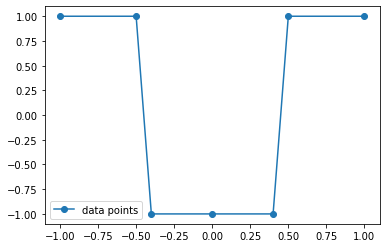

In [2]:
Nmin=-1
Nmax=1
N=7
class MyDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sample = {'data': float(self.data[idx]), 'label': self.label[idx]}
        return sample

    
def fun(x):
    return np.sin(x*np.pi)


data=np.array([-1,-0.5,-0.4,0,0.4,0.5,1])*1.0
label=-(np.array([0,0,1,1,1,0,0])*2.0-1)

train_data=data
train_label=label

plt.plot(train_data,train_label,'-o',label='data points')
plt.legend()
plt.savefig('data_points.png')

train_loader = torch.utils.data.DataLoader(dataset=MyDataset(train_data,train_label), 
                                           batch_size=N, 
                                           shuffle=False)

device = torch.device('cuda')

In [3]:
def mofi_one_line_c_f(record_i,ia=None,ib=None,beta=1,learning_rate=0.2,epoch=10000,dev=100,hidden_size1=10000):
    dev=dev
    traj=[]
    line=[]
    abc=[]
    beta=beta
    learning_rate = learning_rate
    torch.manual_seed(5)
    batchnorm=False
    device = torch.device('cuda')
    model = NeuralNet2layer(input_size, hidden_size1,num_classes, initialize='NTK',batchnorm=False).to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
    criterion = nn.MSELoss()

    outdis = display(progress(0, 100), display_id=True)


    with torch.no_grad():
        if ia !=None:
            model.fc1.weight[record_i][0]=ia
        if ib !=None:
            model.fc1.bias[record_i]=ib
        model.fc1.weight[record_i][0]=model.fc1.weight[record_i][0]/beta
        model.fc1.bias[record_i]=model.fc1.bias[record_i]/beta
        model.fc2.weight[0][record_i]=model.fc2.weight[0][record_i]*beta


    for i, data in enumerate(train_loader):
        pass
    images = data['data'].reshape(-1, 1).to(device).float()
    labels = data['label'].reshape(-1, 1).to(device).float()
    




    for runsteps in range(epoch):
        outputs = model(images).to(device)
        loss = criterion(outputs, labels).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lo=loss.item()


        if runsteps==1000 or runsteps==10000 or runsteps==100000 or runsteps==50000:
            learning_rate = learning_rate * 10
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)


        if runsteps% dev==0:
            outdis.update(progress(outdis.update(progress(100.*runsteps/epoch, 100)), 100))
            with torch.no_grad():
                x=-model.fc1.bias[record_i]/model.fc1.weight[record_i][0].reshape(-1, 1).to(device).float()
                traj.append([x,model(x)])
                x,y=get_line(model)
                line.append([x,y])
                a=model.fc1.weight[record_i][0].cpu().detach().numpy()
                b=model.fc1.bias[record_i].cpu().detach().numpy()
                c=model.fc2.weight[0][record_i].cpu().detach().numpy()
                abc.append([a,b,c])

        if lo<0.0001:
            print('converged')
            break
    with torch.no_grad():
        a=model.fc1.weight[:,0].cpu().detach()
        b=model.fc1.bias[:].cpu().detach()
        
        bpx=-a/b
        fx=torch.ones_like(bpx)
        model.eval()
        for i in range(len(bpx)):
            fx[i]=model(bpx[i].reshape(-1, 1).to(device).float())
        fx=fx.cpu().detach().numpy()
        bpx=bpx.detach().numpy()
    return torch.tensor(traj),model,line,abc,[bpx,fx]

In [4]:
trajlist=[]
linelist=[]
abclist=[]
bplist=[]
N=[200,2000,20000,200000]
for n in N:
    traj,model,line,abc,bp=mofi_one_line_c_f(1,ia=None,ib=None,beta=1,learning_rate=0.0001,epoch=1000000,dev=1000,hidden_size1=n)
    #traj,model,line=mofi_one_line(1,ia=None,ib=None,beta=1,learning_rate=0.00001,epoch=1000000,dev=10000,hidden_size1=n)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)
    abclist.append(abc)
    bplist.append(bp)

NameError: ignored

# BP

# New section

IndexError: ignored

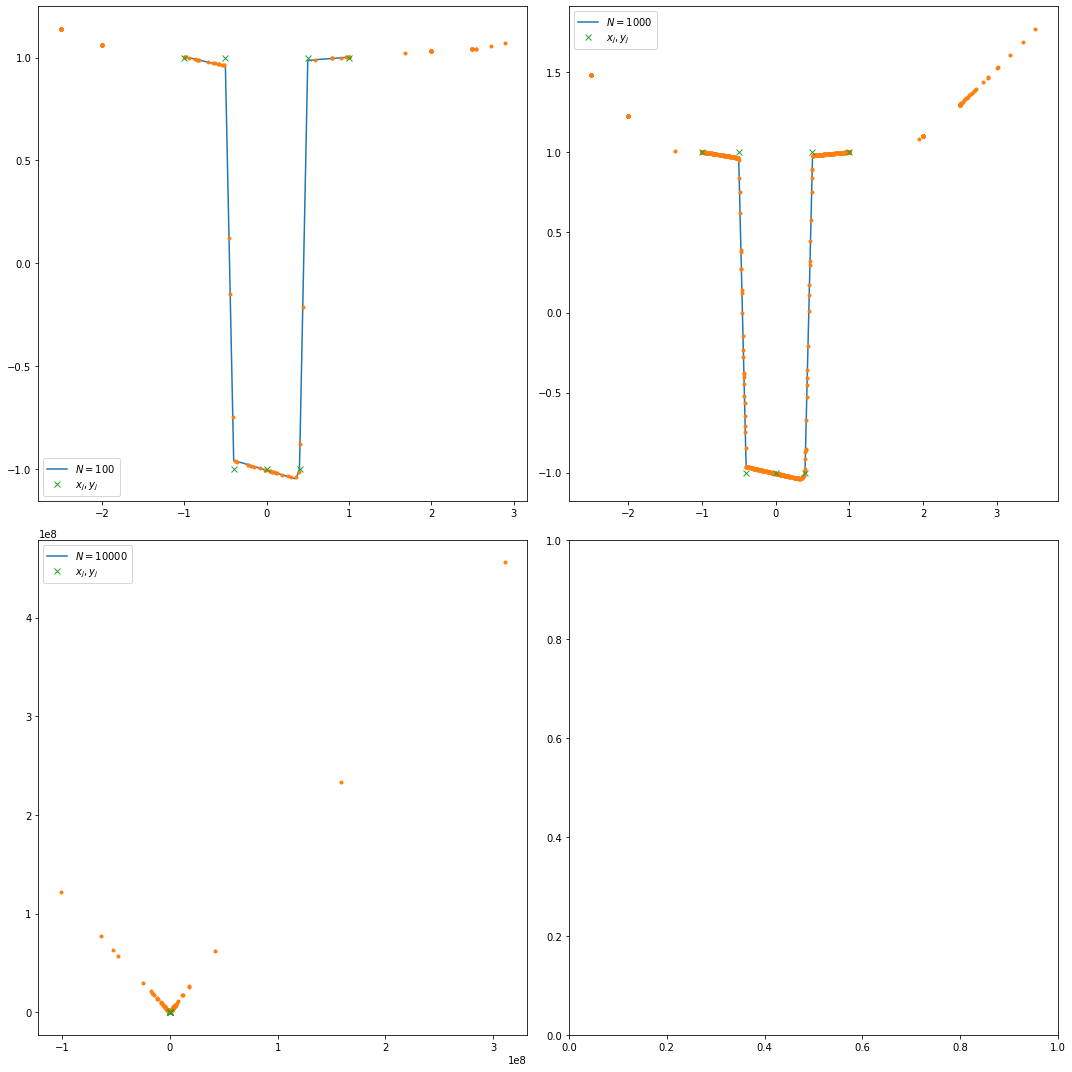

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
fig=plt.figure()
N=[100,1000,10000,100000]
fx=[]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.plot(linelist[i][-1][0],linelist[i][-1][1],label=r'$N=$'+str(N[i]))
    plt.plot(bplist[i][0],bplist[i][1],'.')
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
    plt.xlim([-1.2,1.2])
    plt.ylim([-2,2])
    plt.legend()
plt.savefig('/content/drive/My Drive/LCNN/plot/breakpoint.pdf')

In [ ]:
# Device configuration
device = torch.device('cuda')
# Hyper-parameters 
input_size = 1

hidden_size1 = 100000

num_classes = 1

class NeuralNet2layer(nn.Module):
    def __init__(self, input_size, hidden_size1,num_classes, initialize='NTK',batchnorm=False):
        super(NeuralNet2layer, self).__init__()
        self.initialize=initialize
        self.input_size = input_size
        self.hidden_size1 = hidden_size1
        self.batchnorm = batchnorm


        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, num_classes,bias=False)


        if self.batchnorm:
            self.bn1 = nn.BatchNorm1d(num_features=hidden_size1)
        
        if self.initialize=='NTK':

            self.fc1.weight.detach().uniform_(-1, 1)
            self.fc1.bias.detach().uniform_(-1, 1)
            self.fc2.weight.detach().uniform_(-1,1)




    def forward(self, x):
        if self.batchnorm:
            if self.initialize=='LeCun':
                out = self.fc1(x)
                out = self.bn1(out)
                out = self.relu1(out)
                out = self.fc2(out)

            if self.initialize=='NTK':
                out = self.fc1(x)
                out = out/np.sqrt(self.input_size)
                out = self.bn1(out)
                out = self.relu1(out)
                out = self.fc2(out)
                out = out/np.sqrt(self.hidden_size1)
        else:
            if self.initialize=='LeCun':
                out = self.fc1(x)
                out = self.relu1(out)
                out = self.fc2(out)

            if self.initialize=='NTK':
                out = self.fc1(x)
                out = out/np.sqrt(self.input_size)
                out = self.relu1(out)
                out = self.fc2(out)
                out = out/np.sqrt(self.hidden_size1)
        return out

In [ ]:
def plot_training(model,node_num=1000):
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')

    
    x= np.linspace(Nmin, Nmax, num=node_num)
    y= np.zeros(node_num)
    with torch.no_grad():
        for i in range(node_num):
            xx=torch.tensor(x[i]).reshape(-1, 1).to(device).float()
            y[i]=model(xx).to(device).cpu().numpy()
    plt.plot(x,y,'-',label=r'$x,f(x)$')
 

# New section

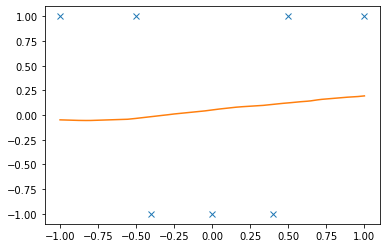

In [ ]:
    torch.manual_seed(7)
    batchnorm=False
    device = torch.device('cuda')
    model = NeuralNet2layer(input_size, hidden_size1,num_classes, initialize='NTK',batchnorm=False).to(device)
    plot_training(model)

In [ ]:
def mofi_one_line(record_i,ia=None,ib=None,beta=1,learning_rate=0.2,epoch=10000,dev=100,hidden_size1=10000):
    dev=dev
    traj=[]
    line=[]
    beta=beta
    learning_rate = learning_rate
    torch.manual_seed(5)
    batchnorm=False
    device = torch.device('cuda')
    model = NeuralNet2layer(input_size, hidden_size1,num_classes, initialize='NTK',batchnorm=False).to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
    criterion = nn.MSELoss()

    outdis = display(progress(0, 100), display_id=True)


    with torch.no_grad():
        if ia !=None:
            model.fc1.weight[record_i][0]=ia
        if ib !=None:
            model.fc1.bias[record_i]=ib
        model.fc1.weight[record_i][0]=model.fc1.weight[record_i][0]/beta
        model.fc1.bias[record_i]=model.fc1.bias[record_i]/beta
        model.fc2.weight[0][record_i]=model.fc2.weight[0][record_i]*beta


    for i, data in enumerate(train_loader):
        pass
    images = data['data'].reshape(-1, 1).to(device).float()
    labels = data['label'].reshape(-1, 1).to(device).float()
    




    for runsteps in range(epoch):
        outputs = model(images).to(device)
        loss = criterion(outputs, labels).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lo=loss.item()


        if runsteps==1000 or runsteps==10000 or runsteps==100000 or runsteps==50000:
            learning_rate = learning_rate * 10
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)


        if runsteps% dev==0:
            outdis.update(progress(outdis.update(progress(100.*runsteps/epoch, 100)), 100))
            with torch.no_grad():
                x=-model.fc1.bias[record_i]/model.fc1.weight[record_i][0].reshape(-1, 1).to(device).float()
                traj.append([x,model(x)])
                x,y=get_line(model)
                line.append([x,y])

        if lo<0.0001:
            print('break')
            break
    return torch.tensor(traj),model,line

In [ ]:
def get_line(model,node_num=1000,Nmin=-1, Nmax=1):
    x= np.linspace(Nmin, Nmax, num=node_num)
    y= np.zeros(node_num)
    with torch.no_grad():
        for i in range(node_num):
            xx=torch.tensor(x[i]).reshape(-1, 1).to(device).float()
            y[i]=model(xx).to(device).cpu().numpy()
    return x,y

In [ ]:
traj,model,lines=mofi_one_line(1,ia=-0.5,ib=0.1,beta=1,learning_rate=0.001,epoch=100000,dev=1000)

break


In [ ]:
[trajlist,linelist]=np.load('/content/drive/My Drive/LCNN/Lines.npy',allow_pickle=True)

In [ ]:
trajlist=[]
linelist=[]
for beta in [0.01,0.05,0.1,0.5,1,5,10,50]:
    traj,model,line=mofi_one_line(1,ia=-0.5,ib=0.1,beta=beta,learning_rate=0.01,epoch=1000000,dev=100)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)

np.save('/content/drive/My Drive/LCNN/Lines2.npy', [trajlist,linelist])

break


break


break


break


break


break


break


break


In [ ]:
from google.colab import widgets
maxtire=0
for i in range(len(linelist)):
    if maxtire<len(linelist[i]):
        maxtire=len(linelist[i])
pl=np.arange(maxtire)
index=pl*100
#bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
bl=[0.01,0.05,0.1,0.5,1,5,10,50]
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#c=['w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b']
tb = widgets.TabBar([str(i) for i in index])

for i in range(len(pl)):
  # Only select the first 3 tabs, and render others in the background.
  with tb.output_to(i):

    plt.rcParams["figure.figsize"] = (15,15)
    step=pl[i]
    for iii in range(len(bl)):
        if len(linelist[iii])>step:
            plt.plot(linelist[iii][step][0],linelist[iii][step][1],'-',color=c[iii],label=r'$\beta=$'+str(bl[iii]))
            plt.plot(trajlist[iii][:step+1,0],trajlist[iii][:step+1,1],'-',color=c[iii])
            plt.plot(trajlist[iii][step,0],trajlist[iii][step,1],'x',label=r'Trajectory,$\beta=$'+str(bl[iii]),color=c[iii])
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim([-1.2,1.2])
    plt.ylim([-2,2])
    plt.ylabel('Loss')
    plt.xlabel('step')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
trajlist=[]
linelist=[]
#for beta in [0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]:
for beta in [0.01,0.05,0.1,0.5,1,5,10,50]:
    traj,model,line=mofi_one_line(1,ia=-0.5,ib=0.1,beta=beta,learning_rate=0.0001,epoch=1000000,dev=500)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)

np.save('/content/drive/My Drive/LCNN/Lines2.npy', [trajlist,linelist])



break


break


break


break


break


break


break


break


break


### wait

In [ ]:
from google.colab import widgets

pl=np.arange(59)
index=pl*500
#bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#c=['w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b']
tb = widgets.TabBar([str(i) for i in index])

for i in range(len(pl)):
  # Only select the first 3 tabs, and render others in the background.
  with tb.output_to(i):

    plt.rcParams["figure.figsize"] = (15,15)
    step=pl[i]
    for iii in range(len(bl)):
        if iii==0:
            continue
        if len(linelist[iii])>step:
            plt.plot(linelist[iii][step][0],linelist[iii][step][1],'-',color=c[iii],label=r'$\beta=$'+str(bl[iii]))
            plt.plot(trajlist[iii][:step+1,0],trajlist[iii][:step+1,1],'-',color=c[iii])
            plt.plot(trajlist[iii][step,0],trajlist[iii][step,1],'x',label=r'Trajectory,$\beta=$'+str(bl[iii]),color=c[iii])
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim([-1.2,1.2])
    plt.ylim([-2,2])
    plt.ylabel('Loss')
    plt.xlabel('step')
    

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(bl)

10

In [ ]:
len(linelist[7])

60

In [ ]:
len(linelist[0])

200

In [ ]:
from google.colab import widgets
pl=np.arange(200)
index=pl*500
#bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#c=['w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b']
tb = widgets.TabBar([str(i) for i in index])

for i in range(len(pl)):
  # Only select the first 3 tabs, and render others in the background.
  with tb.output_to(i):

    plt.rcParams["figure.figsize"] = (15,15)
    step=pl[i]
    for iii in range(len(bl)):
        if iii==0:
            continue
        if len(linelist[iii])>step:
            plt.plot(linelist[iii][step][0],linelist[iii][step][1],'-',color=c[iii],label=r'$\beta=$'+str(bl[iii]))
            plt.plot(trajlist[iii][:step+1,0],trajlist[iii][:step+1,1],'-',color=c[iii])
            plt.plot(trajlist[iii][step,0],trajlist[iii][step,1],'x',label=r'Trajectory,$\beta=$'+str(bl[iii]),color=c[iii])
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim([-1.2,1.2])
    plt.ylim([-2,2])
    plt.ylabel('Loss')
    plt.xlabel('step')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(linelist[0])

946

In [ ]:
def mofi_one_line_c(record_i,ia=None,ib=None,beta=1,learning_rate=0.2,epoch=10000,dev=100,hidden_size1=10000):
    dev=dev
    traj=[]
    line=[]
    abc=[]
    beta=beta
    learning_rate = learning_rate
    torch.manual_seed(5)
    batchnorm=False
    device = torch.device('cuda')
    model = NeuralNet2layer(input_size, hidden_size1,num_classes, initialize='NTK',batchnorm=False).to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
    criterion = nn.MSELoss()

    outdis = display(progress(0, 100), display_id=True)


    with torch.no_grad():
        if ia !=None:
            model.fc1.weight[record_i][0]=ia
        if ib !=None:
            model.fc1.bias[record_i]=ib
        model.fc1.weight[record_i][0]=model.fc1.weight[record_i][0]/beta
        model.fc1.bias[record_i]=model.fc1.bias[record_i]/beta
        model.fc2.weight[0][record_i]=model.fc2.weight[0][record_i]*beta


    for i, data in enumerate(train_loader):
        pass
    images = data['data'].reshape(-1, 1).to(device).float()
    labels = data['label'].reshape(-1, 1).to(device).float()
    




    for runsteps in range(epoch):
        outputs = model(images).to(device)
        loss = criterion(outputs, labels).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lo=loss.item()


        if runsteps==1000 or runsteps==10000 or runsteps==100000 or runsteps==50000:
            learning_rate = learning_rate * 10
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)


        if runsteps% dev==0:
            outdis.update(progress(outdis.update(progress(100.*runsteps/epoch, 100)), 100))
            with torch.no_grad():
                x=-model.fc1.bias[record_i]/model.fc1.weight[record_i][0].reshape(-1, 1).to(device).float()
                traj.append([x,model(x)])
                x,y=get_line(model)
                line.append([x,y])
                a=model.fc1.weight[record_i][0].cpu().detach().numpy()
                b=model.fc1.bias[record_i].cpu().detach().numpy()
                c=model.fc2.weight[0][record_i].cpu().detach().numpy()
                abc.append([a,b,c])

                if lo<0.0005:
                    print('converged')
                    break
    return torch.tensor(traj),model,line,abc

In [ ]:
trajlist=[]
linelist=[]
N=[100,1000,10000,100000]
#for beta in [0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]:
for n in N:
    traj,model,line=mofi_one_line(1,ia=None,ib=None,beta=1,learning_rate=0.001,epoch=1000000,dev=500,hidden_size1=n)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)

break


break


break


break


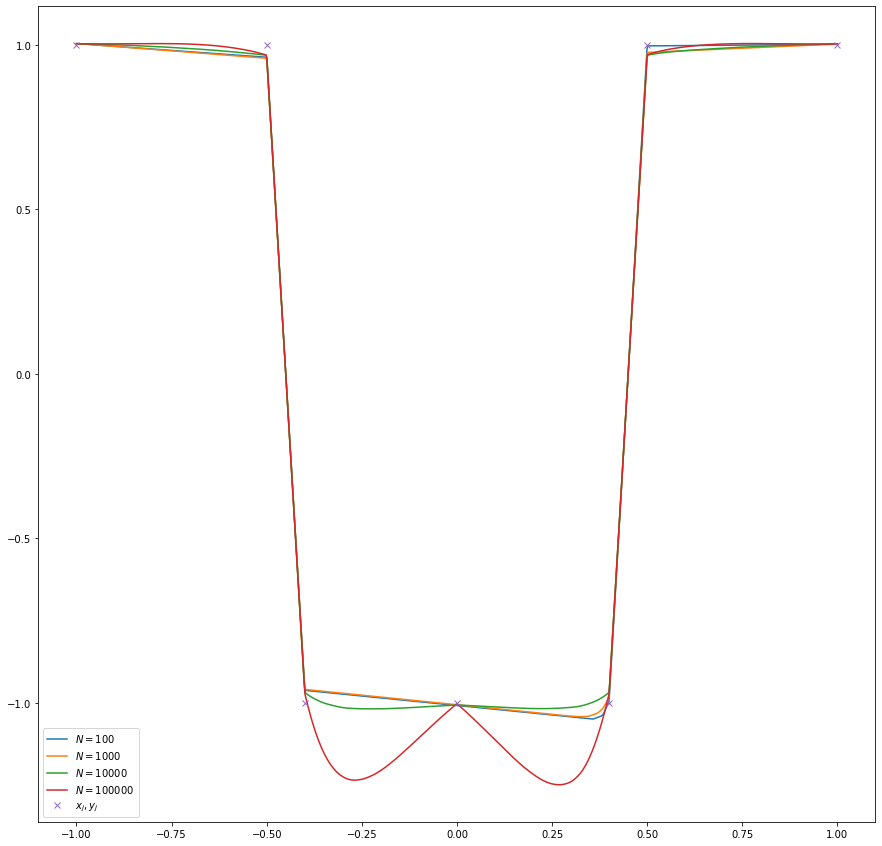

In [ ]:
N=[100,1000,10000,100000]
for i in range(len(N)):
    plt.plot(linelist[i][-1][0],linelist[i][-1][1],label=r'$N=$'+str(N[i]))
plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')

plt.legend()

In [ ]:
trajlist=[]
linelist=[]
abclist=[]
for beta in [0.01,0.05,0.1,0.5,1,5,10,50]:
    traj,model,line,abc=mofi_one_line_c(1,ia=-0.5,ib=0.1,beta=beta,learning_rate=0.001,epoch=1000000,dev=300,hidden_size1=100000)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)
    abclist.append(abc)

np.save('/content/drive/My Drive/LCNN/fL1.npy', [trajlist,linelist,abclist])

converged


converged


converged


converged


converged


converged


converged


converged


In [ ]:
len(linelist[0])

169

In [ ]:
from google.colab import widgets
pl=np.arange(200)
index=pl*300
#bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
bl=[0.01,0.05,0.1,0.5,1,5,10,50]
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#c=['w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b']
tb = widgets.TabBar([str(i) for i in index])

for i in range(len(pl)):
  # Only select the first 3 tabs, and render others in the background.
  with tb.output_to(i):

    plt.rcParams["figure.figsize"] = (15,15)
    step=pl[i]
    for iii in range(len(bl)):
        if iii==0:
            continue
        if len(linelist[iii])>step:
            plt.plot(linelist[iii][step][0],linelist[iii][step][1],'-',color=c[iii],label=r'$\beta=$'+str(bl[iii]))
            plt.plot(trajlist[iii][:step+1,0],trajlist[iii][:step+1,1],'-',color=c[iii])
            plt.plot(trajlist[iii][step,0],trajlist[iii][step,1],'x',label=r'Trajectory,$\beta=$'+str(bl[iii]),color=c[iii])
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim([-1.2,1.2])
    plt.ylim([-2,2])
    plt.ylabel('Loss')
    plt.xlabel('step')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def mofi_one_line_c(record_i,ia=None,ib=None,beta=1,learning_rate=0.2,epoch=10000,dev=100,hidden_size1=10000):
    dev=dev
    traj=[]
    line=[]
    abc=[]
    beta=beta
    learning_rate = learning_rate
    torch.manual_seed(0)
    batchnorm=False
    device = torch.device('cuda')
    model = NeuralNet2layer(input_size, hidden_size1,num_classes, initialize='NTK',batchnorm=False).to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
    criterion = nn.MSELoss()

    outdis = display(progress(0, 100), display_id=True)


    with torch.no_grad():
        if ia !=None:
            model.fc1.weight[record_i][0]=ia
        if ib !=None:
            model.fc1.bias[record_i]=ib
        model.fc1.weight[record_i][0]=model.fc1.weight[record_i][0]/beta
        model.fc1.bias[record_i]=model.fc1.bias[record_i]/beta
        model.fc2.weight[0][record_i]=model.fc2.weight[0][record_i]*beta


    for i, data in enumerate(train_loader):
        pass
    images = data['data'].reshape(-1, 1).to(device).float()
    labels = data['label'].reshape(-1, 1).to(device).float()
    
    lo=10
    for runsteps in range(epoch):



        if runsteps==1000 or runsteps==10000 or runsteps==100000 or runsteps==50000:
            learning_rate = learning_rate * 10
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)


        if runsteps% dev==0:
            outdis.update(progress(outdis.update(progress(100.*runsteps/epoch, 100)), 100))
            with torch.no_grad():
                x=-model.fc1.bias[record_i]/model.fc1.weight[record_i][0].reshape(-1, 1).to(device).float()
                traj.append([x,model(x)])
                x,y=get_line(model)
                line.append([x,y])
                a=model.fc1.weight[record_i][0].cpu().detach().numpy()
                b=model.fc1.bias[record_i].cpu().detach().numpy()
                c=model.fc2.weight[0][record_i].cpu().detach().numpy()
                abc.append([a,b,c])

                if lo<0.0005:
                    print('converged')
                    break


        outputs = model(images).to(device)
        loss = criterion(outputs, labels).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lo=loss.item()
    return torch.tensor(traj),model,line,abc

# display

## init

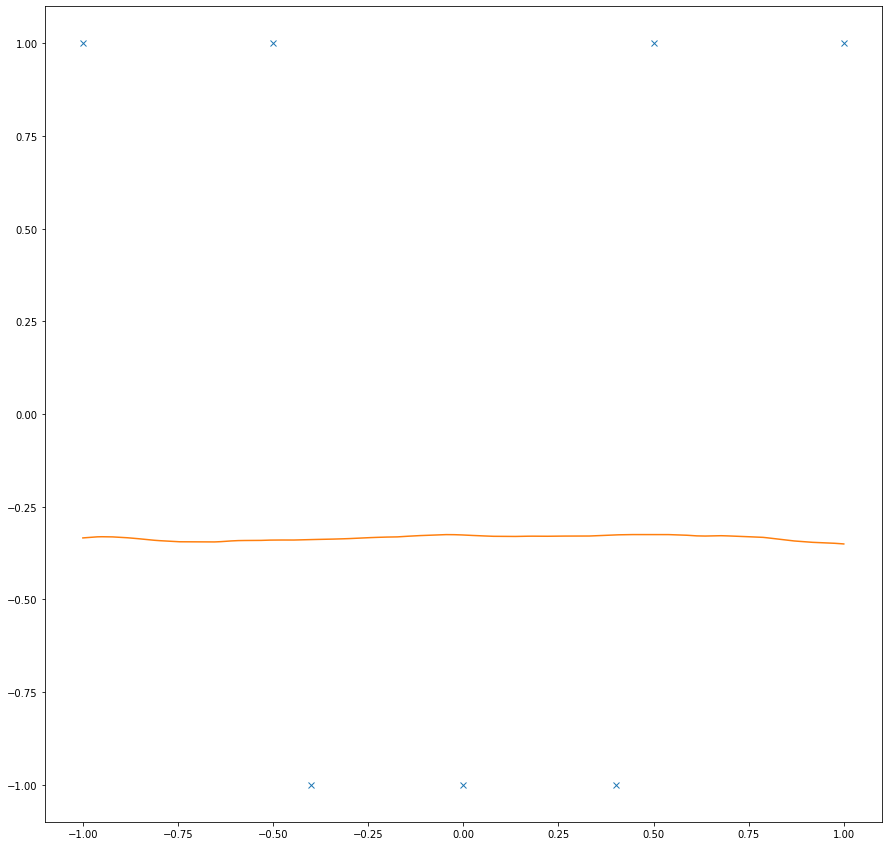

In [ ]:
torch.manual_seed(0)
batchnorm=False
device = torch.device('cuda')
model = NeuralNet2layer(input_size,100000,num_classes, initialize='NTK',batchnorm=False).to(device)
plot_training(model)

## N variation 

In [ ]:
trajlist=[]
linelist=[]
abclist=[]
N=[100,1000,10000,100000]
for n in N:
    traj,model,line,abc=mofi_one_line_c(1,ia=None,ib=None,beta=1,learning_rate=0.0001,epoch=1000000,dev=1000,hidden_size1=n)
    #traj,model,line=mofi_one_line(1,ia=None,ib=None,beta=1,learning_rate=0.00001,epoch=1000000,dev=10000,hidden_size1=n)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)
    abclist.append(abc)

converged


converged


converged


converged


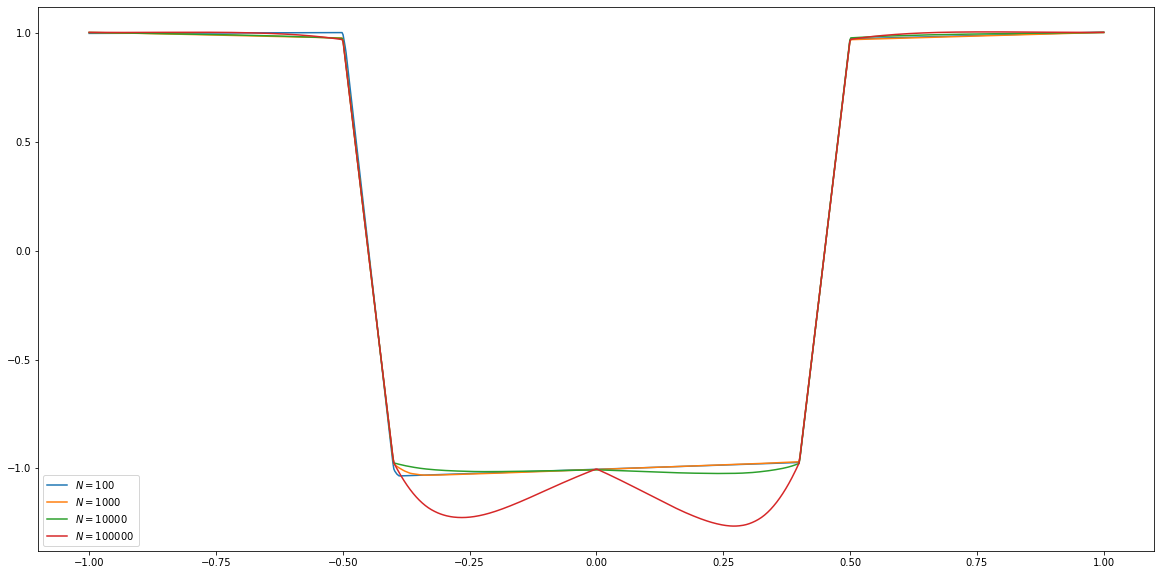

In [ ]:
N=[100,1000,10000,100000]
for i in range(len(N)):
    plt.plot(linelist[i][-1][0],linelist[i][-1][1],label=r'$N=$'+str(N[i]))

plt.legend()

## N= 1000

In [ ]:
trajlist=[]
linelist=[]
abclist=[]
for beta in [0.01,0.05,0.1,0.5,1,5,10,50]:
    traj,model,line,abc=mofi_one_line_c(1,ia=-0.5,ib=0.1,beta=beta,learning_rate=0.0001,epoch=1000000,dev=300,hidden_size1=1000)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)
    abclist.append(abc)
np.save('/content/drive/My Drive/LCNN/uni1000.npy', [trajlist,linelist,abclist])

converged


converged


converged


converged


converged


converged


converged


converged


In [ ]:
from google.colab import widgets
maxtire=0
for i in range(len(linelist)):
    if maxtire<len(linelist[i]):
        maxtire=len(linelist[i])
pl=np.arange(maxtire)
index=pl*300
#bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
bl=[0.01,0.05,0.1,0.5,1,5,10,50]
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#c=['w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b']
tb = widgets.TabBar([str(i) for i in index])
xlow=-2
xhigh=2



for i in range(len(pl)):
    with tb.output_to(i):

        plt.rcParams["figure.figsize"] = (20,10)
        fig, (ax1, ax2) = plt.subplots(ncols=2)
        step=pl[i]
        for iii in range(len(bl)):
            if iii==0:
                continue
            if len(linelist[iii])>step:
                ax1.plot(linelist[iii][step][0],linelist[iii][step][1],'-',color=c[iii],label=r'$\beta=$'+str(bl[iii]))
                ax1.plot(trajlist[iii][:step+1,0],trajlist[iii][:step+1,1],'--',color=c[iii])
                ax1.plot(trajlist[iii][step,0],trajlist[iii][step,1],'o',label=r'Trajectory,$\beta=$'+str(bl[iii]),color=c[iii])
                abc=abclist[iii]
                abc=np.array(abc)
                a=abc[:,0]
                b=abc[:,1]
                cc=abc[:,2]
                ax2.plot((a*cc)[:step+1],(b*cc)[:step+1],'-',color=c[iii])
                ax2.plot((a*cc)[step],(b*cc)[step],'o',color=c[iii],label=r'$\beta=$'+str(bl[iii]))

        for linei in range(len(train_data)):
            ti=train_data[linei]/train_label[linei]
            x=np.linspace(10*xlow,10*xhigh, num=100)
            ax2.plot(x,x*ti,'--',color='gray')
        
        
        ax1.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax1.set_xlim(-1.2,1.2)
        ax1.set_ylim(-2,2)


        ax2.set_xlabel('ac')
        ax2.set_ylabel('bc')
        ax2.set_xlim(10*xlow,0)
        ax2.set_ylim(10*xlow,xhigh*10)
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Output hidden; open in https://colab.research.google.com to view.

## N=10000

In [ ]:
trajlist=[]
linelist=[]
abclist=[]
for beta in [0.01,0.05,0.1,0.5,1,5,10,50]:
    traj,model,line,abc=mofi_one_line_c(1,ia=-0.5,ib=0.1,beta=beta,learning_rate=0.0001,epoch=1000000,dev=300,hidden_size1=10000)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)
    abclist.append(abc)
np.save('/content/drive/My Drive/LCNN/uni10000.npy', [trajlist,linelist,abclist])

converged


converged


converged


converged


converged


converged


converged


converged


In [ ]:
from google.colab import widgets
maxtire=0
for i in range(len(linelist)):
    if maxtire<len(linelist[i]):
        maxtire=len(linelist[i])
pl=np.arange(maxtire)
index=pl*300
#bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
bl=[0.01,0.05,0.1,0.5,1,5,10,50]
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#c=['w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b']
tb = widgets.TabBar([str(i) for i in index])
xlow=-2
xhigh=2



for i in range(len(pl)):
    with tb.output_to(i):

        plt.rcParams["figure.figsize"] = (20,10)
        fig, (ax1, ax2) = plt.subplots(ncols=2)
        step=pl[i]
        for iii in range(len(bl)):
            if iii==0:
                continue
            if len(linelist[iii])>step:
                ax1.plot(linelist[iii][step][0],linelist[iii][step][1],'-',color=c[iii],label=r'$\beta=$'+str(bl[iii]))
                ax1.plot(trajlist[iii][:step+1,0],trajlist[iii][:step+1,1],'--',color=c[iii])
                ax1.plot(trajlist[iii][step,0],trajlist[iii][step,1],'o',label=r'Trajectory,$\beta=$'+str(bl[iii]),color=c[iii])
                abc=abclist[iii]
                abc=np.array(abc)
                a=abc[:,0]
                b=abc[:,1]
                cc=abc[:,2]
                ax2.plot((a*cc)[:step+1],(b*cc)[:step+1],'-',color=c[iii])
                ax2.plot((a*cc)[step],(b*cc)[step],'o',color=c[iii],label=r'$\beta=$'+str(bl[iii]))

        for linei in range(len(train_data)):
            ti=train_data[linei]/train_label[linei]
            x=np.linspace(10*xlow,10*xhigh, num=100)
            ax2.plot(x,x*ti,'--',color='gray')
        
        
        ax1.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax1.set_xlim(-1.2,1.2)
        ax1.set_ylim(-2,2)


        ax2.set_xlabel('ac')
        ax2.set_ylabel('bc')
        ax2.set_xlim(10*xlow,0)
        ax2.set_ylim(10*xlow,xhigh*10)
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Output hidden; open in https://colab.research.google.com to view.

## N=100000

In [ ]:
trajlist=[]
linelist=[]
abclist=[]
for beta in [0.01,0.05,0.1,0.5,1,5,10,50]:
    traj,model,line,abc=mofi_one_line_c(1,ia=-0.5,ib=0.1,beta=beta,learning_rate=0.0001,epoch=1000000,dev=300,hidden_size1=100000)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)
    abclist.append(abc)
np.save('/content/drive/My Drive/LCNN/uni100000.npy', [trajlist,linelist,abclist])

converged


converged


converged


converged


converged


converged


converged


converged


In [ ]:
from google.colab import widgets
maxtire=0
for i in range(len(linelist)):
    if maxtire<len(linelist[i]):
        maxtire=len(linelist[i])
pl=np.arange(maxtire)
index=pl*300
#bl=[0.001,0.05,0.1,0.3,0.5,1,1.5,2,5,10]
bl=[0.01,0.05,0.1,0.5,1,5,10,50]
c=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
#c=['w','b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b']
tb = widgets.TabBar([str(i) for i in index])
xlow=-2
xhigh=2



for i in range(len(pl)):
    with tb.output_to(i):

        plt.rcParams["figure.figsize"] = (20,10)
        fig, (ax1, ax2) = plt.subplots(ncols=2)
        step=pl[i]
        for iii in range(len(bl)):
            if iii==0:
                continue
            if len(linelist[iii])>step:
                ax1.plot(linelist[iii][step][0],linelist[iii][step][1],'-',color=c[iii],label=r'$\beta=$'+str(bl[iii]))
                ax1.plot(trajlist[iii][:step+1,0],trajlist[iii][:step+1,1],'--',color=c[iii])
                ax1.plot(trajlist[iii][step,0],trajlist[iii][step,1],'o',label=r'Trajectory,$\beta=$'+str(bl[iii]),color=c[iii])
                abc=abclist[iii]
                abc=np.array(abc)
                a=abc[:,0]
                b=abc[:,1]
                cc=abc[:,2]
                ax2.plot((a*cc)[:step+1],(b*cc)[:step+1],'-',color=c[iii])
                ax2.plot((a*cc)[step],(b*cc)[step],'o',color=c[iii],label=r'$\beta=$'+str(bl[iii]))

        for linei in range(len(train_data)):
            ti=train_data[linei]/train_label[linei]
            x=np.linspace(10*xlow,10*xhigh, num=100)
            ax2.plot(x,x*ti,'--',color='gray')
        
        
        ax1.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax1.set_xlim(-1.2,1.2)
        ax1.set_ylim(-2,2)


        ax2.set_xlabel('ac')
        ax2.set_ylabel('bc')
        ax2.set_xlim(10*xlow,0)
        ax2.set_ylim(10*xlow,xhigh*10)
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def plot_training(model,node_num=1000):
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')

    
    x= np.linspace(Nmin, Nmax, num=node_num)
    y= np.zeros(node_num)
    with torch.no_grad():
        for i in range(node_num):
            xx=torch.tensor(x[i]).reshape(-1, 1).to(device).float()
            y[i]=model(xx).to(device).cpu().numpy()
    plt.plot(x,y,'-',label=r'$x,f(x)$')
 


def get_line(model,node_num=10000,Nmin=-1, Nmax=1):
    x= np.linspace(Nmin, Nmax, num=node_num)
    y= np.zeros(node_num)
    with torch.no_grad():
        for i in range(node_num):
            xx=torch.tensor(x[i]).reshape(-1, 1).to(device).float()
            y[i]=model(xx).to(device).cpu().numpy()
    return x,y


def mofi_one_line_c_f(record_i,ia=None,ib=None,beta=1,learning_rate=0.2,epoch=10000,dev=100,hidden_size1=10000):
    dev=dev
    traj=[]
    line=[]
    abc=[]
    beta=beta
    learning_rate = learning_rate
    torch.manual_seed(5)
    batchnorm=False
    device = torch.device('cuda')
    model = NeuralNet2layer(input_size, hidden_size1,num_classes, initialize='LeCun',batchnorm=False).to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)
    criterion = nn.MSELoss()

    outdis = display(progress(0, 100), display_id=True)


    with torch.no_grad():
        if ia !=None:
            model.fc1.weight[record_i][0]=ia
        if ib !=None:
            model.fc1.bias[record_i]=ib
        model.fc1.weight[record_i][0]=model.fc1.weight[record_i][0]/beta
        model.fc1.bias[record_i]=model.fc1.bias[record_i]/beta
        model.fc2.weight[0][record_i]=model.fc2.weight[0][record_i]*beta


    for i, data in enumerate(train_loader):
        pass
    images = data['data'].reshape(-1, 1).to(device).float()
    labels = data['label'].reshape(-1, 1).to(device).float()
    




    for runsteps in range(epoch):
        outputs = model(images).to(device)
        loss = criterion(outputs, labels).to(device)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lo=loss.item()


        if runsteps==1000 or runsteps==10000 or runsteps==100000 or runsteps==50000:
            learning_rate = learning_rate * 10
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0.9)


        if runsteps% dev==0 or lo<0.0001:
            outdis.update(progress(outdis.update(progress(100.*runsteps/epoch, 100)), 100))
            with torch.no_grad():
                x=-model.fc1.bias[record_i]/model.fc1.weight[record_i][0].reshape(-1, 1).to(device).float()
                traj.append([x,model(x)])
                x,y=get_line(model)
                line.append([x,y])
                a=model.fc1.weight[record_i][0].cpu().detach().numpy()
                b=model.fc1.bias[record_i].cpu().detach().numpy()
                c=model.fc2.weight[0][record_i].cpu().detach().numpy()
                abc.append([a,b,c])

        if lo<0.00001:
            print('converged')
            break
    with torch.no_grad():
        a=model.fc1.weight[:,0].cpu().detach()
        b=model.fc1.bias[:].cpu().detach()
        bpx=-b/a
        model.eval()

        fx=model(bpx.reshape(-1, 1).to(device).float())
        fx=fx.cpu().detach().numpy()
        bpx=bpx.detach().numpy()
    return torch.tensor(traj),model,line,abc,[bpx,fx]


In [ ]:
trajlist=[]
linelist=[]
abclist=[]
bplist=[]
N=[100,1000,10000]
for n in N:
    traj,model,line,abc,bp=mofi_one_line_c_f(1,ia=None,ib=None,beta=1,learning_rate=0.0001,epoch=1000000,dev=1000,hidden_size1=n)
    #traj,model,line=mofi_one_line(1,ia=None,ib=None,beta=1,learning_rate=0.00001,epoch=1000000,dev=10000,hidden_size1=n)
    traj=traj.cpu()
    trajlist.append(traj)
    linelist.append(line)
    abclist.append(abc)
    bplist.append(bp)

converged


converged


converged


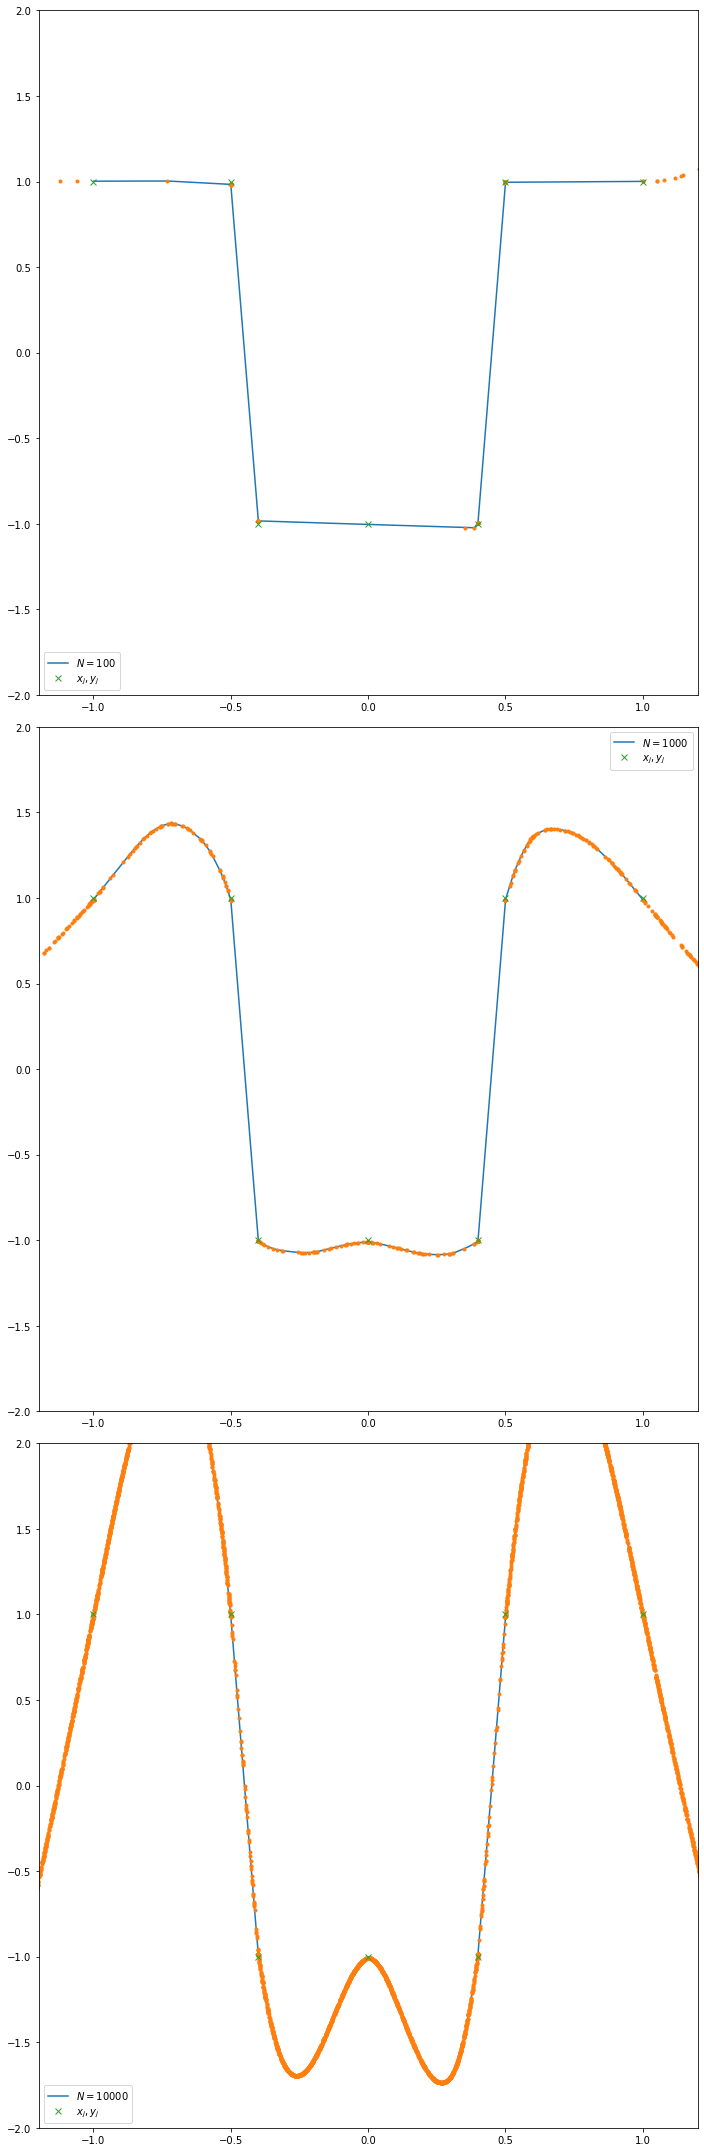

In [ ]:
plt.rcParams["figure.figsize"] = (10,30)
fig=plt.figure()
N=[100,1000,10000]
fx=[]
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.tight_layout()
    plt.plot(linelist[i][-1][0],linelist[i][-1][1],label=r'$N=$'+str(N[i]))
    plt.plot(bplist[i][0],bplist[i][1],'.')
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
    plt.xlim([-1.2,1.2])
    plt.ylim([-2,2])
    plt.legend()
plt.savefig('/content/drive/My Drive/LCNN/plot/jinji1.pdf')

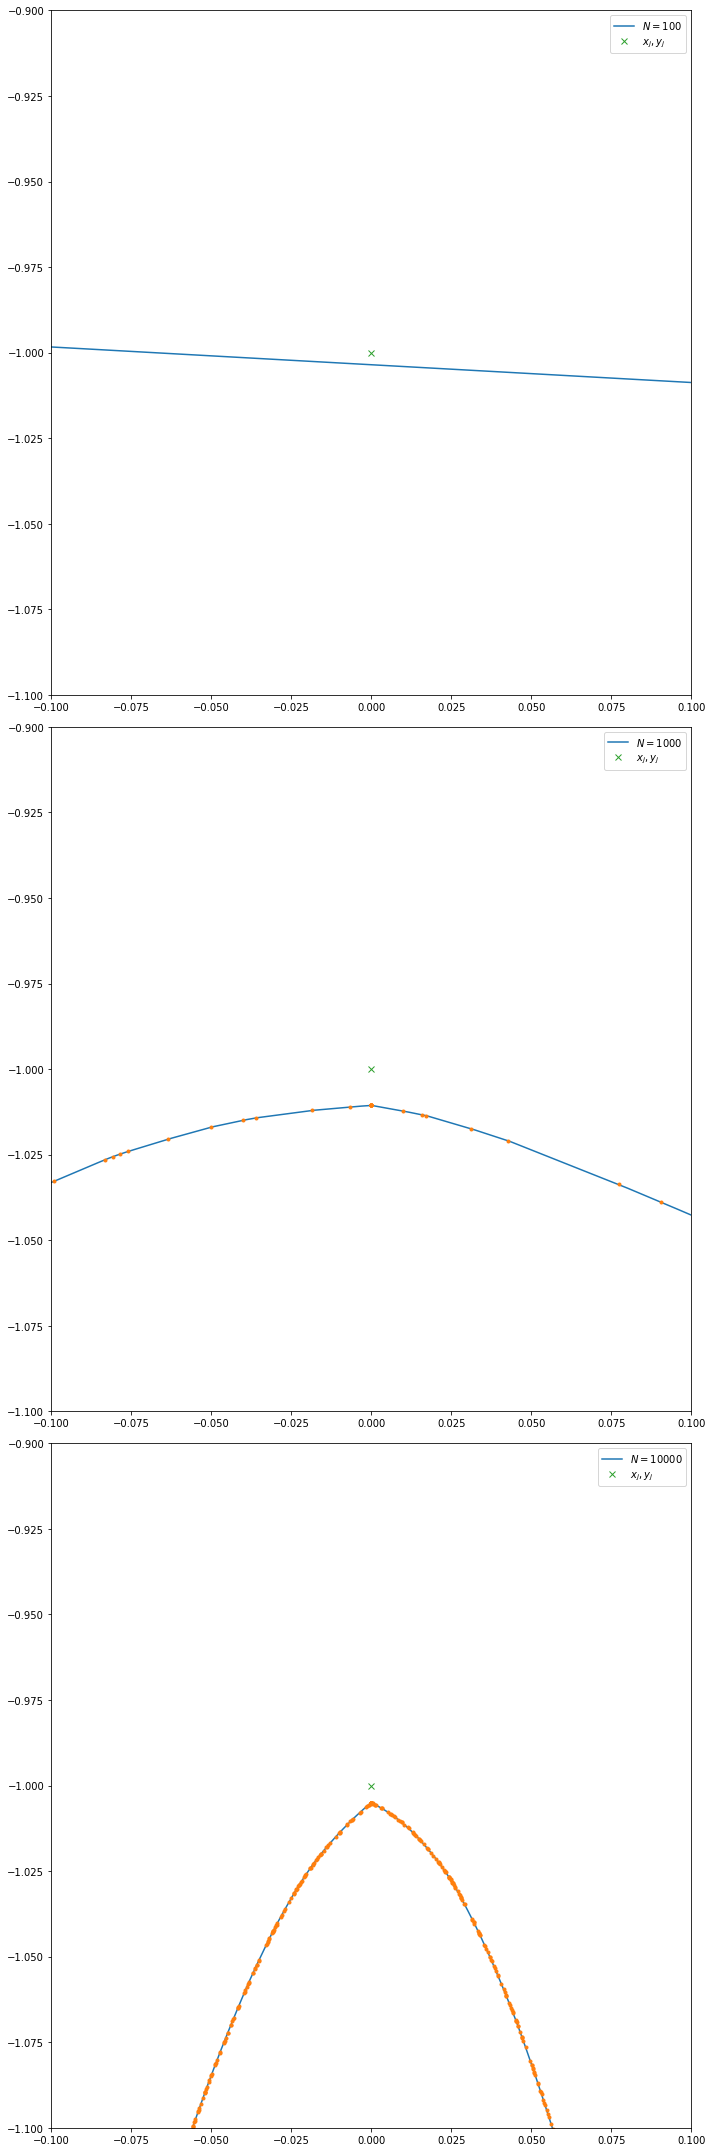

In [ ]:
plt.rcParams["figure.figsize"] = (10,30)
fig=plt.figure()
N=[100,1000,10000]
fx=[]
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.tight_layout()
    plt.plot(linelist[i][-1][0],linelist[i][-1][1],label=r'$N=$'+str(N[i]))
    plt.plot(bplist[i][0],bplist[i][1],'.')
    plt.plot(train_data,train_label,'x',label=r'$x_j,y_j$')
    plt.xlim([-0.1,0.1])
    plt.ylim([-1.1,-0.9])
    plt.legend()
plt.savefig('/content/drive/My Drive/LCNN/plot/jinji2.pdf')